**Import the Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [4]:
df = pd.read_csv("winequality-red.csv")

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**🍷 Feature Descriptions**

1. **fixed acidity**  
   Non-volatile acids (like tartaric acid) that don’t evaporate easily. Contribute to the wine's tart taste and stability.

2. **volatile acidity**  
   Refers mainly to acetic acid (vinegar-like). High levels can cause unpleasant flavors. A small amount is normal, but too much leads to spoilage.

3. **citric acid**  
   Adds freshness and flavor. Excessive levels are uncommon but increase acidity.

4. **residual sugar**  
   Sugar left in wine after fermentation. Wines with less than 4 g/L are considered dry. Higher values indicate sweeter wines.

5. **chlorides**  
   Reflects salt content. High concentrations can make the wine taste salty and unpleasant.

6. **free sulfur dioxide**  
   Sulfur dioxide used as an antimicrobial and antioxidant. "Free" SO₂ is the portion available to protect the wine. Crucial for preservation.

7. **total sulfur dioxide**  
   Sum of free and bound SO₂. Excess levels can cause pungent odors. Strictly regulated in winemaking.

8. **density**  
   Influenced by sugar and alcohol content. Useful for monitoring fermentation progress.

9. **pH**  
   Measures acidity/alkalinity. Lower pH means higher acidity. Typical wine pH ranges from 2.9 to 4.0.

10. **sulphates**  
    Sulfate salts that contribute to taste and stability. Also serve as preservatives.

11. **alcohol**  
    Ethanol content, usually measured in % by volume.

12. **quality** 🎯  
    Target variable. A score (usually 0–10, most often 3–8) based on sensory assessment—taste, aroma, and mouthfeel.

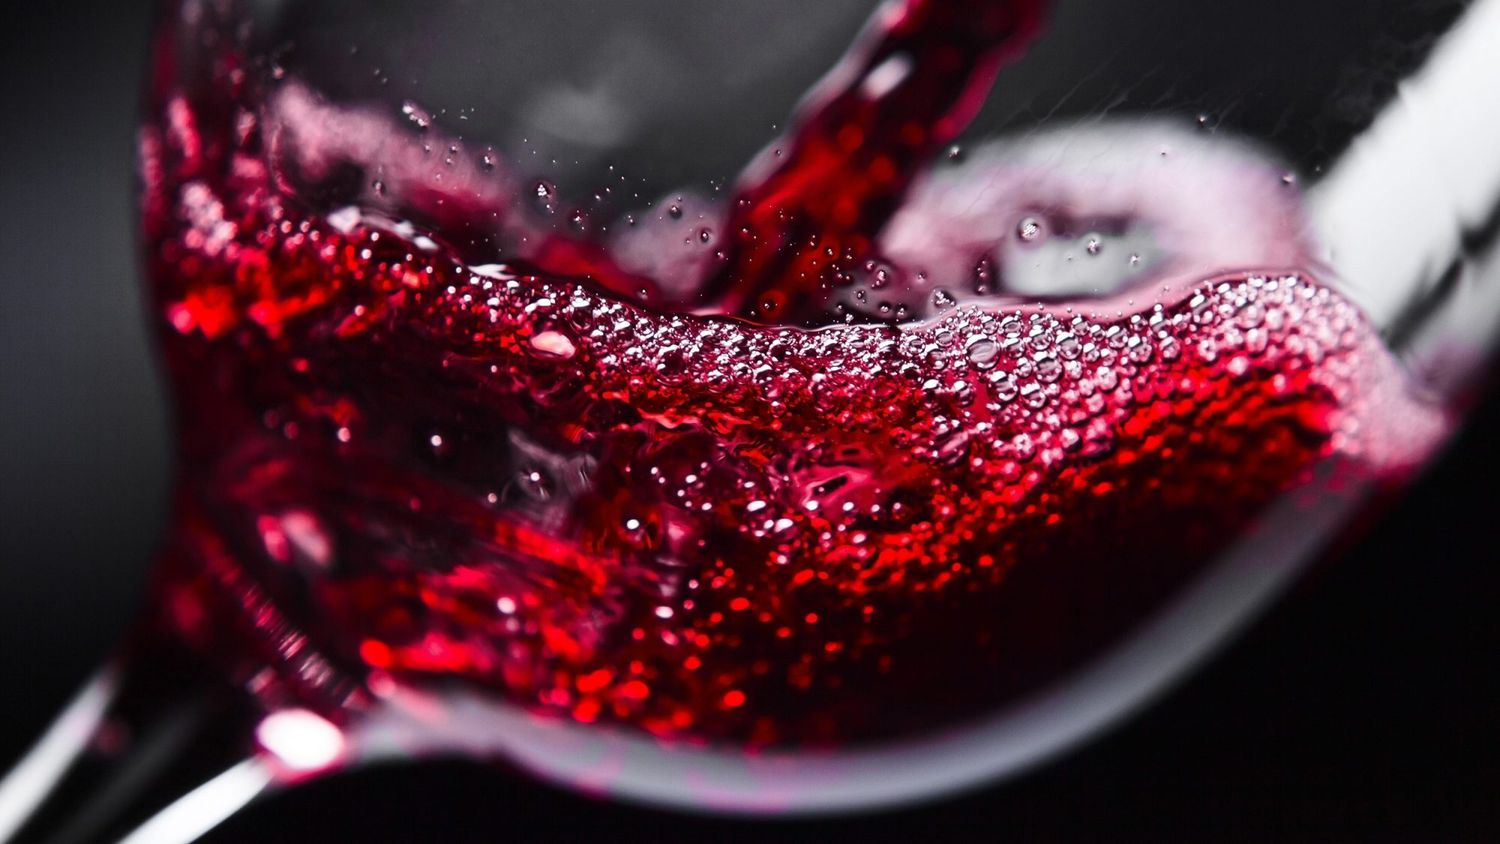

# **EDA**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- There are no null values in the dataset

In [11]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

***visualize the relationship between the independent varaibles and dependent variable***

In [13]:
df.columns[:-1] # only the independent variables

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

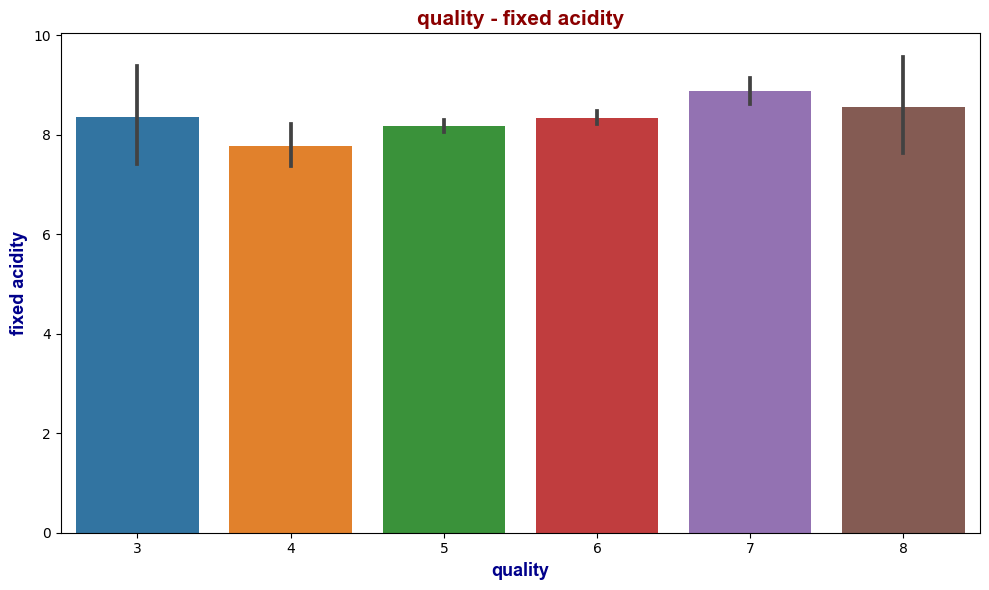

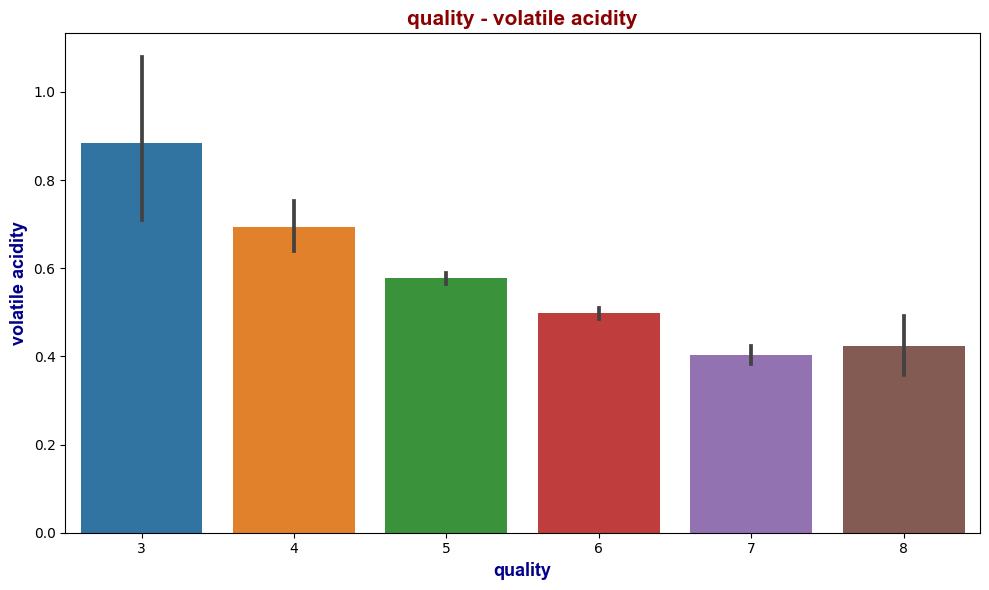

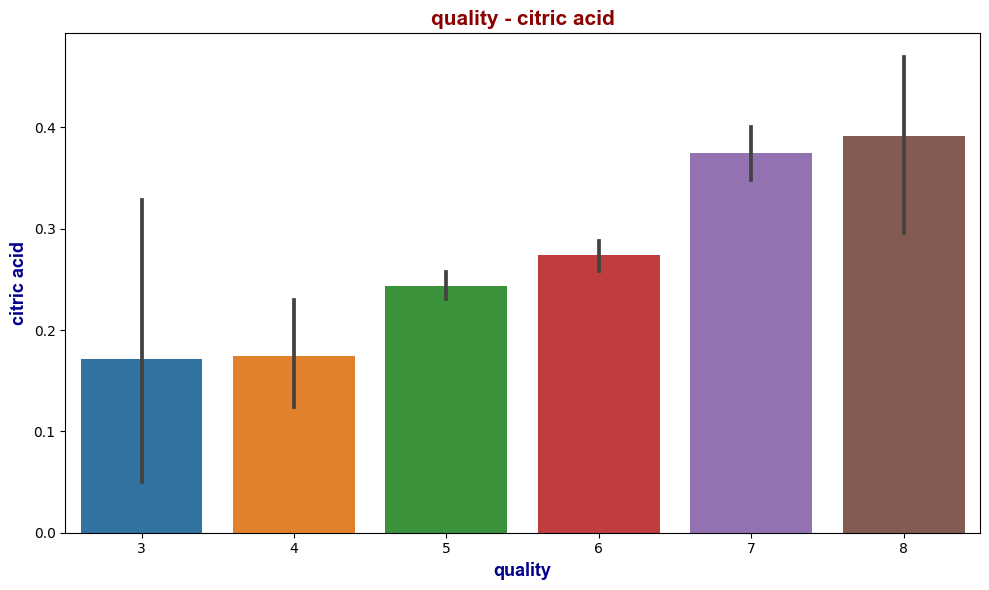

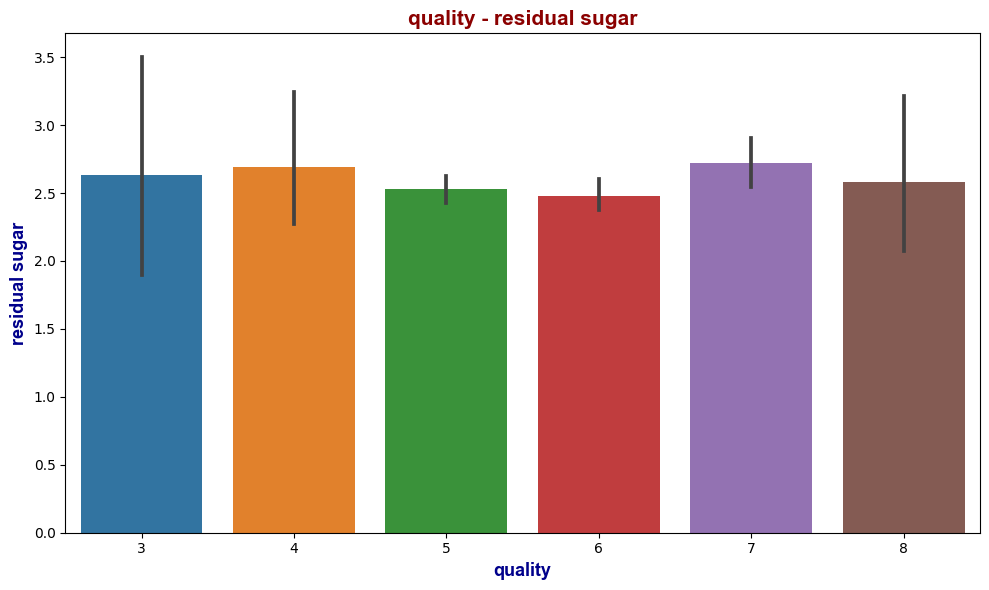

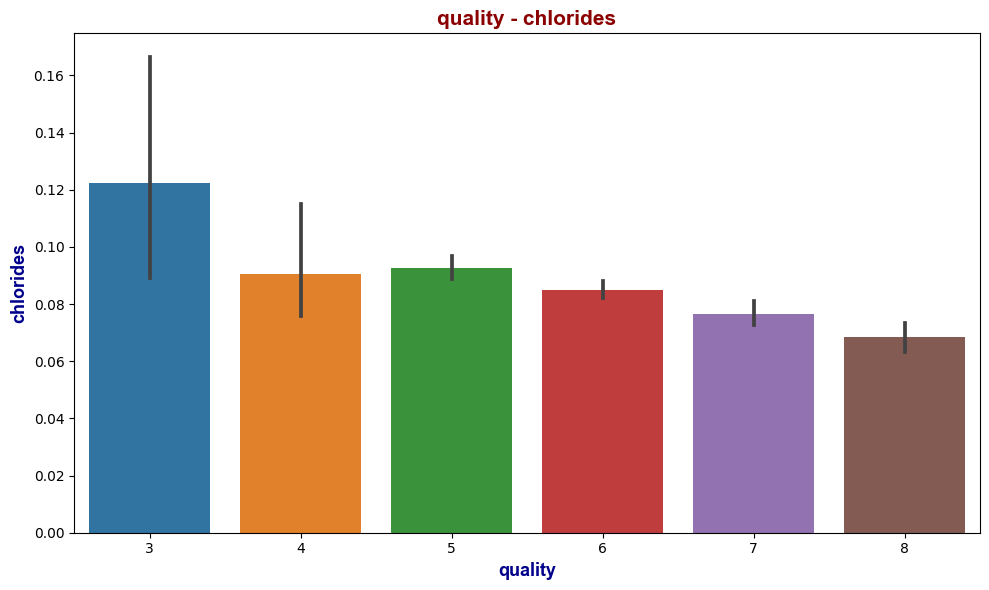

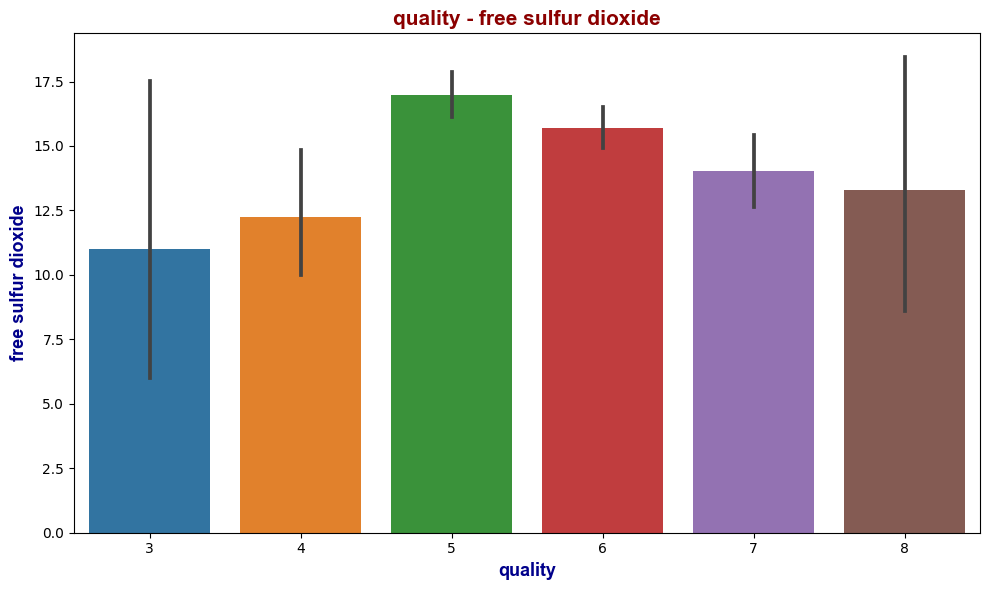

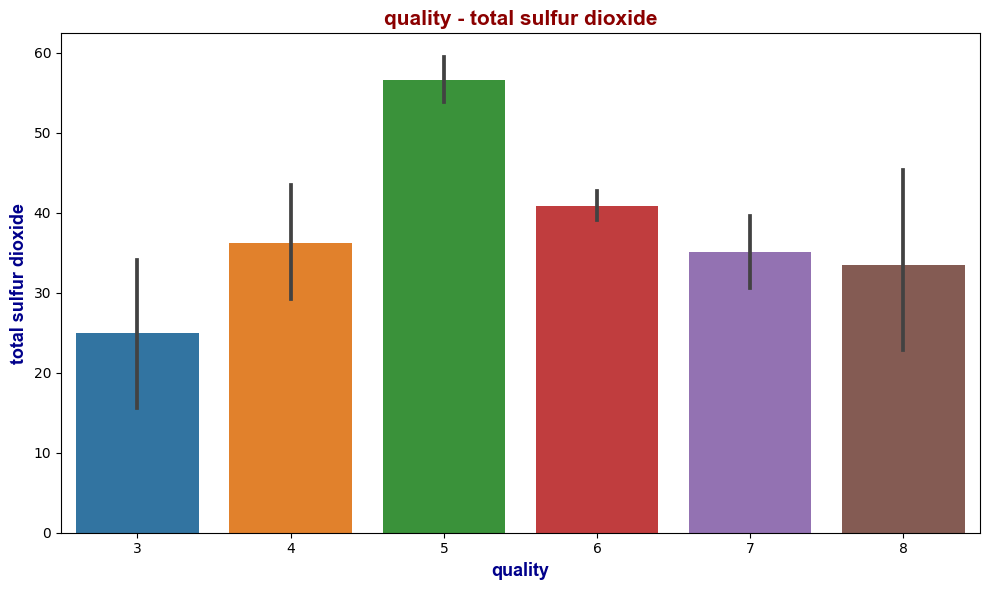

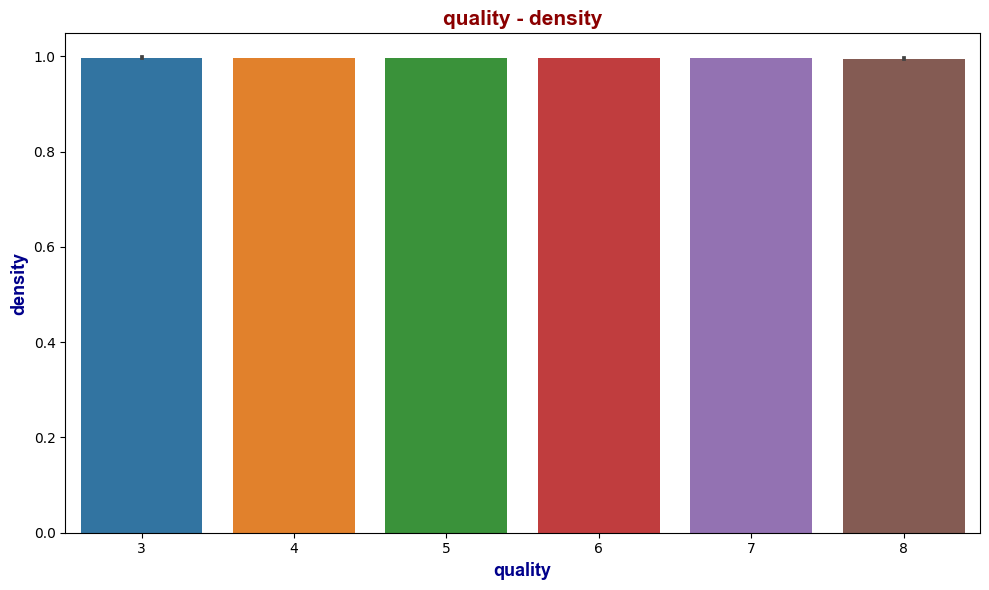

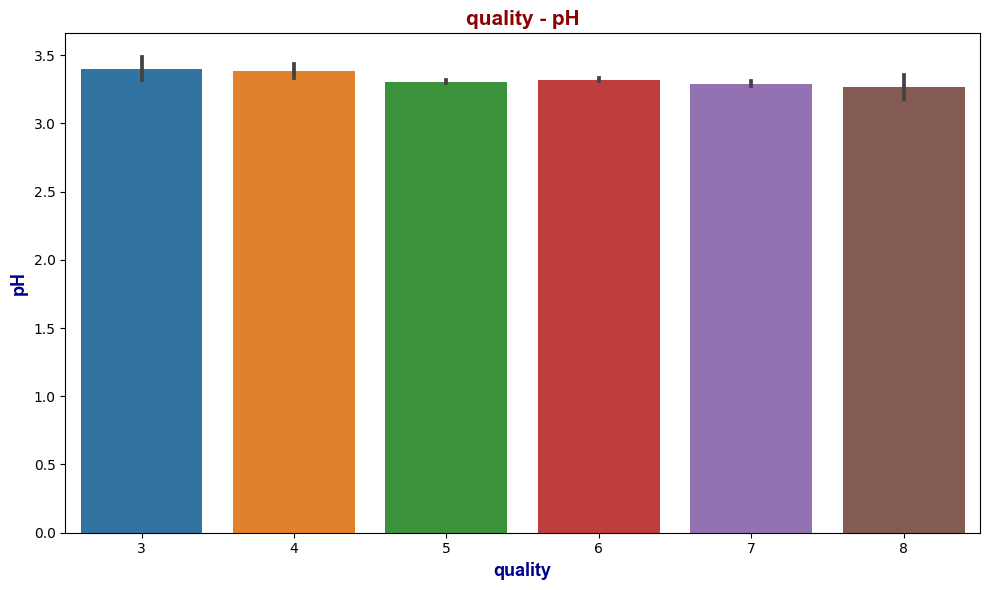

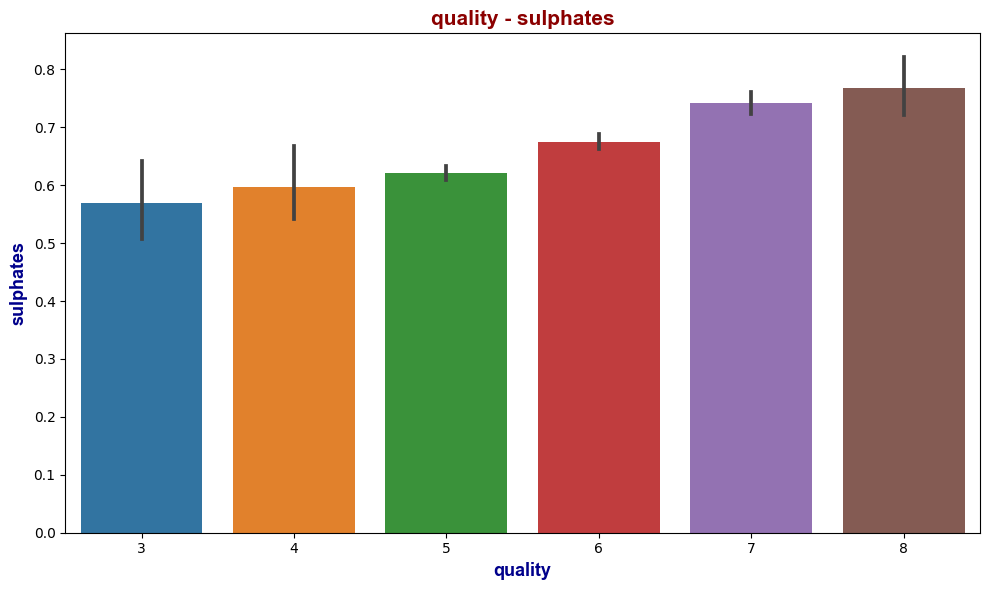

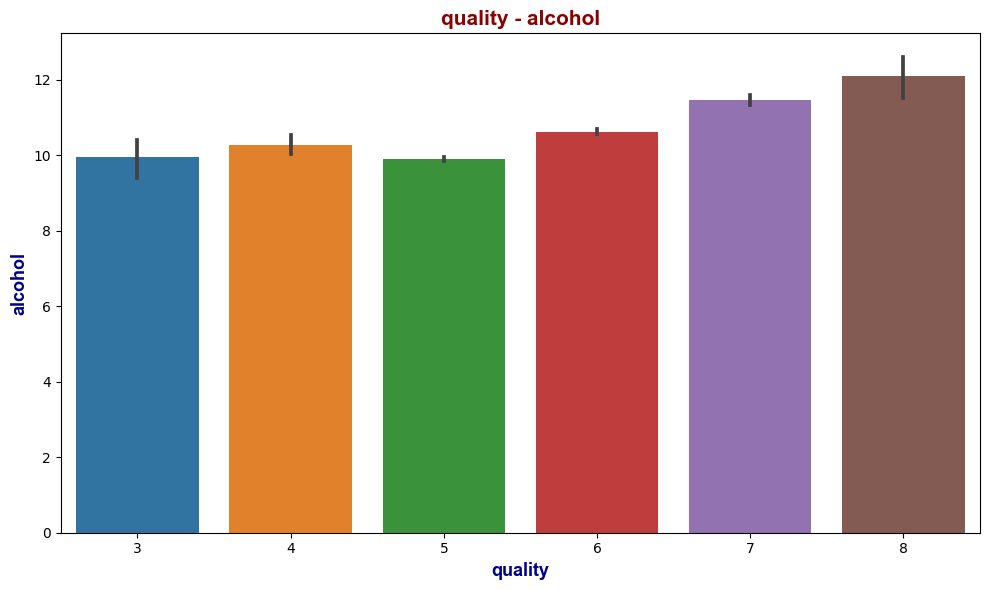

In [15]:
for i in df.columns[:-1]:
    plt.figure(figsize= (10,6))
    sns.barplot(x = "quality", y = i, data = df)
    plt.title("quality - " + i, fontdict= title_font)
    plt.xlabel("quality", fontdict = axis_font)
    plt.ylabel(i, fontdict= axis_font)
    plt.tight_layout() # automatically adjust the spacing of subplots so that elements like labels, titles, and ticks don’t overlap or get cut off.
    plt.show()

**Heatmap of Correlation Matrix**

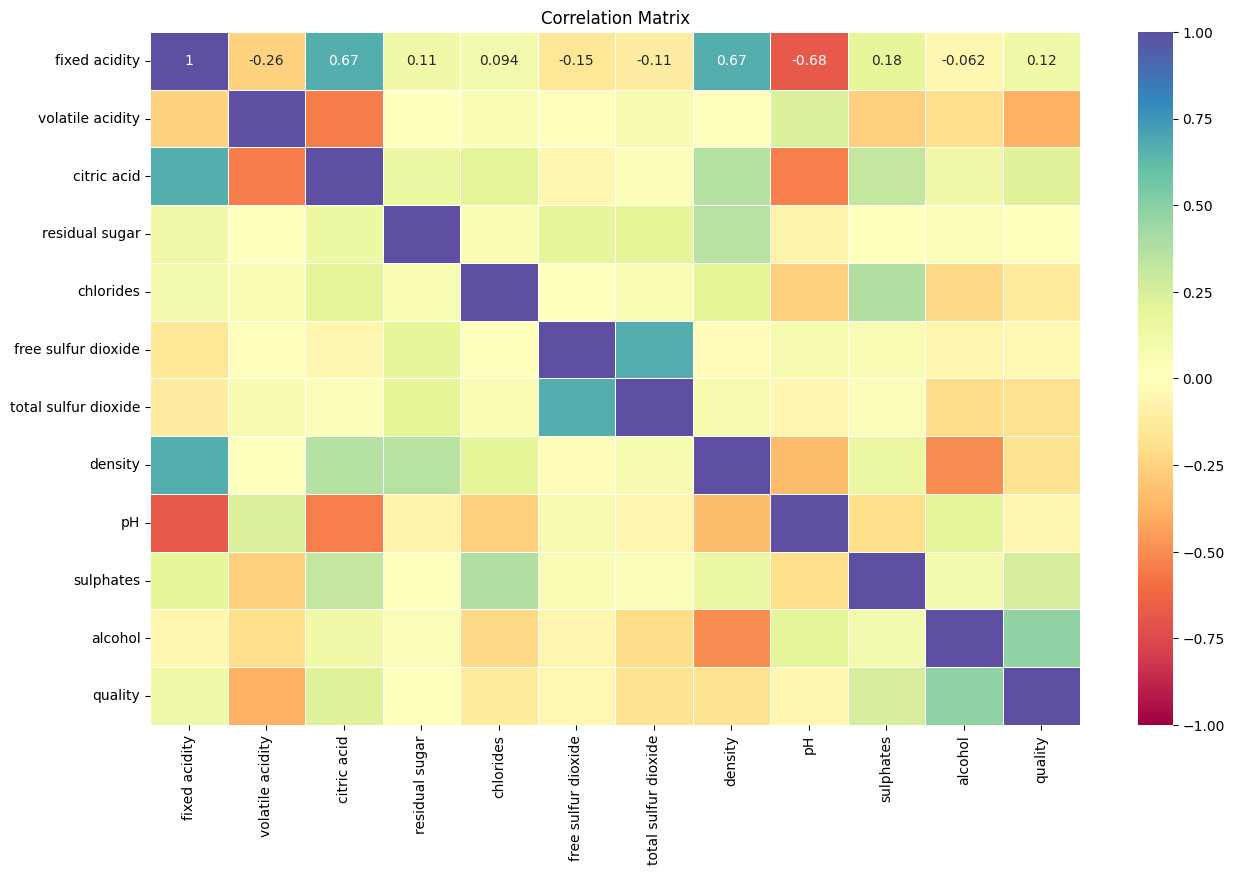

In [17]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap="Spectral", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
plt.close()

In [18]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


residual sugar, free sulfur dioxide and pH have the least correlation to the target variable. Let's drop them

**Multicollinearity check for the independent variables with Correlation Matrix with Thresholds method:**

In [21]:
# create a new df for the independent variables
df_independent = df.drop(columns=["quality"])

df_independent.head(10)

*Correlation matrix*

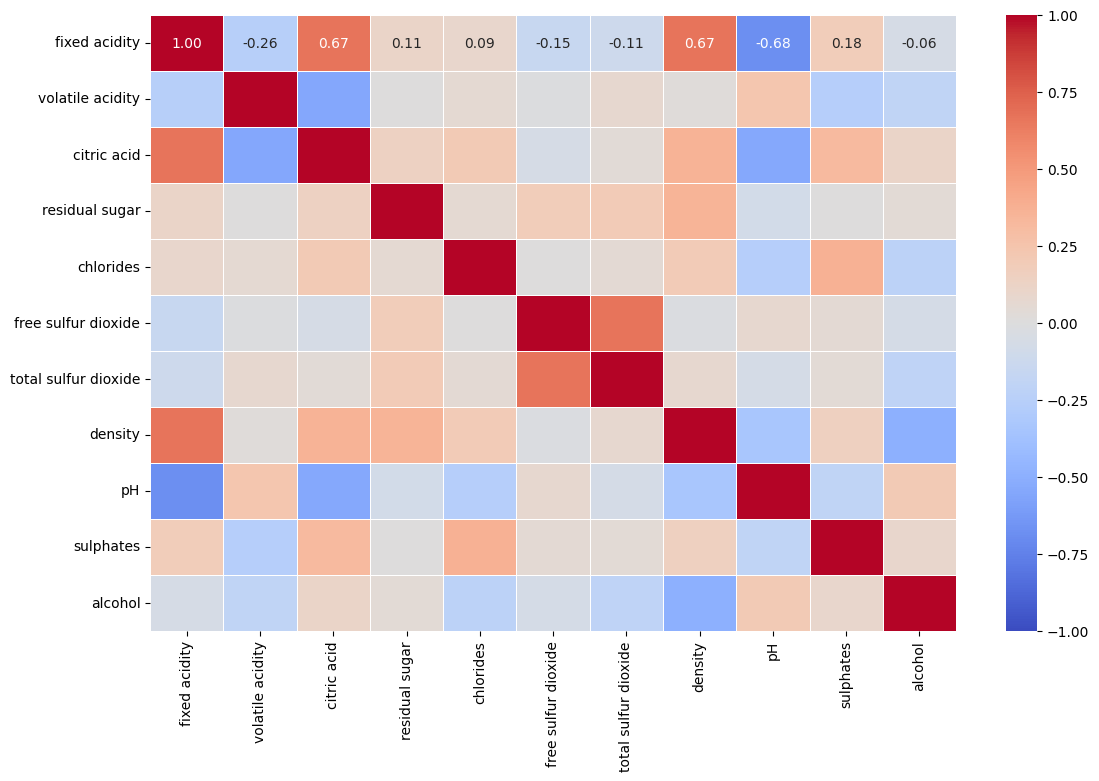

In [24]:
plt.figure(figsize=(13, 8))
corr_matrix = df_independent.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidth=0.5, cmap="coolwarm", vmin = -1, vmax = 1)
plt.show()

In [25]:
corr_independent = df_independent.corr()
corr_independent

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [26]:
corr_independent_abs = df_independent.corr().abs()
corr_independent_abs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668
volatile acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288
citric acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141
free sulfur dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408
total sulfur dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595


In [27]:
# Select upper triangle of correlation matrix
upper = corr_independent_abs.where(np.triu(np.ones(corr_independent_abs.shape), k=1).astype(bool))

In [28]:
# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [29]:
print("Highly correlated variables:", to_drop)

Highly correlated variables: []


- There are no Highly correlated variables

# **Preparation for modelling**

In [32]:
columns_to_drop = ["residual sugar", "free sulfur dioxide", "pH"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


we can change the quality variable to binary format, i.e, the quality is either good or poor

In [35]:
bins = (2, 6.5, 8) # if quality is between 2 - 6.5, it will classify as poor, but between 6.5 and 8, it will classify as good
group_names = ["poor", "good"]
df["quality"] = pd.cut(df.quality, bins = bins, labels= group_names)

In [36]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,poor
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,poor
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,poor
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,poor
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,poor
5,7.4,0.66,0.00,0.075,40.0,0.9978,0.56,9.4,poor
6,7.9,0.60,0.06,0.069,59.0,0.9964,0.46,9.4,poor
7,7.3,0.65,0.00,0.065,21.0,0.9946,0.47,10.0,good
8,7.8,0.58,0.02,0.073,18.0,0.9968,0.57,9.5,good
9,7.5,0.50,0.36,0.071,102.0,0.9978,0.80,10.5,poor


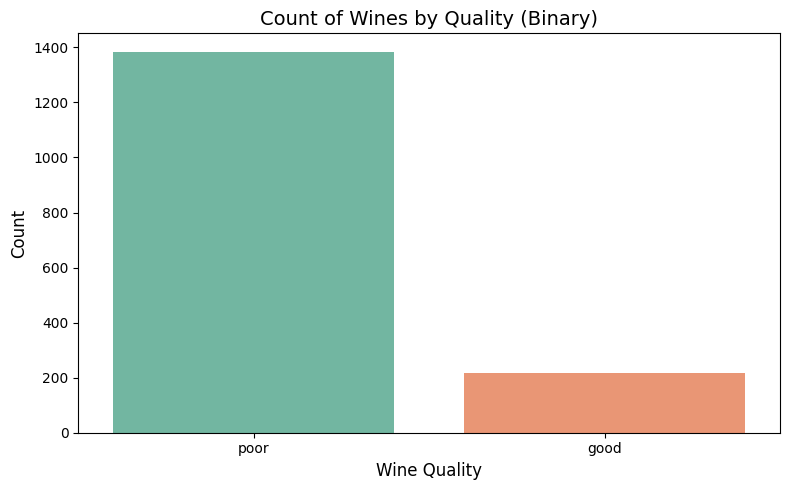

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x="quality", data=df, palette="Set2")
plt.title("Count of Wines by Quality (Binary)", fontsize=14)
plt.xlabel("Wine Quality", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

We need to convert the target variable into a numeric type

In [39]:
df['quality'] = df['quality'].map({'poor': 0, 'good': 1})

In [40]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
5,7.4,0.66,0.00,0.075,40.0,0.9978,0.56,9.4,0
6,7.9,0.60,0.06,0.069,59.0,0.9964,0.46,9.4,0
7,7.3,0.65,0.00,0.065,21.0,0.9946,0.47,10.0,1
8,7.8,0.58,0.02,0.073,18.0,0.9968,0.57,9.5,1
9,7.5,0.50,0.36,0.071,102.0,0.9978,0.80,10.5,0


In [41]:
df.quality.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

# **SVM Modelling**

In [43]:
# X is all variables except target variable, which is y
X = df.drop("quality", axis=1)
y = df["quality"]

In [44]:
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: category
Categories (2, int64): [0 < 1]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
#random_state=42: This parameter ensures reproducibility. By setting a seed value (42 in this case), the split will be the same every time you run the code, allowing for consistent results.

In [48]:
#Visualize the divisions
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (1279, 8) (1279,)
Test set: (320, 8) (320,)


- Support Vector Machines (SVMs) generally require feature standardization (or scaling).

**Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVC(Support Vector Classifier) Modelling**

In [55]:
from sklearn.svm import SVC

In [56]:
svc_model = SVC()

In [57]:
svc_model.fit(X_train, y_train)

SVC()

In [58]:
y_pred = svc_model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
print("Accuracy Score: ",accuracy_score(y_test, y_pred))

Accuracy Score:  0.875


*Cross-Validation*

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
# Perform k-fold cross-validation on the svc model using the training data (X_train, y_train), with cv=10 indicating 10-fold cross-validation.
cv_scores = cross_val_score(estimator = svc_model, X = X_train, y = y_train, cv = 10)
# Calculate the average accuracy across all 10 validation runs.
cv_scores.mean()

0.8897699311023622

- That's a good accuracy score. But can we increase it?

In [65]:
cv_scores

array([0.875     , 0.8828125 , 0.890625  , 0.890625  , 0.8828125 ,
       0.8828125 , 0.8984375 , 0.890625  , 0.8984375 , 0.90551181])

**Evaluate the confussion matrix metric**

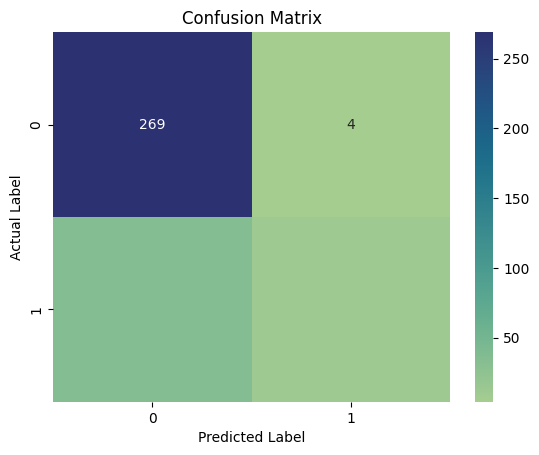

In [118]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "crest", fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [121]:
print(confusion_matrix(y_test, y_pred))

[[269   4]
 [ 36  11]]


**Interpretation**

Rows represent the Actual Classes while Columns represent the Predicted Classes
- First row [269,4]:
    - 269 instances of class 0 were correctly predicted as class 0.(269 bottles were correctly identified as poor quality)
    - 4 instances of class 0 were misclassified as class 1.(4 poor quality bottles were incorrectly identified as good quality wine)
- Second row [36,11]:
    - 36 instances of class 1 were misclassified as class 0.(36 good quality wine bottles were incorrectly identified as poor quality)
    - 11 instances of class 1 were correctly predicted as class 1.(11 good quality wine bottles were correctly identified as good quality)

*Evaluate the Classification_report metric*

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.73      0.23      0.35        47

    accuracy                           0.88       320
   macro avg       0.81      0.61      0.64       320
weighted avg       0.86      0.88      0.85       320



*Interpreting Results*

- Class 0 (poor quality wine)
    - Precision = 0.88: Of all wines predicted as poor, 88% were actually poor.

    - Recall = 0.99: Of all actual poor-quality wines, 99% were correctly identified.

    - F1-score = 0.93: Harmonic mean of precision and recall. High score here means consistent performance on identifying poor wine.

    - Support = 273: There were 273 actual poor quality wines in the test set.
 
- Class 1 (good quality wine)
    - Precision = 0.73: Of all wines predicted as good, only 73% were actually good.

    - Recall = 0.23: Very low recall → only 23% of actual good quality wines were correctly identified.

    - F1-score = 0.35: Low F1 score reflects the imbalance between precision and recall.

    - Support = 47: There were only 47 actual good quality wines.



- Let's perform hyper-parameter optimization to reduce the errors

**Hyperparameter Optimization**

In [158]:
#import GridSearchCV method
from sklearn.model_selection import GridSearchCV

In [149]:
svc_model2 = SVC()

In [153]:
svc_params = {'C': [0.1, 1, 10],
             "gamma": [1, 0.1, 0.01],
             "kernel": ["poly", "rbf"]}

In [161]:
 svc_cv_model = GridSearchCV(estimator = svc_model2, param_grid = svc_params, cv = 10)

In [164]:
#fit the model
svc_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']})

In [166]:
svc_cv_model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

- Let's create a new model using these parameters

In [170]:
svc_tuned = SVC(C = 1, gamma = 1, kernel = 'rbf')

In [172]:
#Train the tuned model
svc_tuned.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [175]:
#Test the tuned model
y_pred = svc_tuned.predict(X_test)

- Let's have a look at the tuned model's accuracy

In [179]:
print("Accuracy Score: ",accuracy_score(y_test, y_pred))

Accuracy Score:  0.896875


In [181]:
# Perform k-fold cross-validation on the decision tree model (dt_tuned) using the training data (X_train, y_train), with cv=10 indicating 10-fold cross-validation.
cv_scores = cross_val_score(estimator = svc_tuned, X = X_train, y = y_train, cv = 10)
# Calculate the average accuracy across all 10 validation runs.
cv_scores.mean()

0.8975885826771653

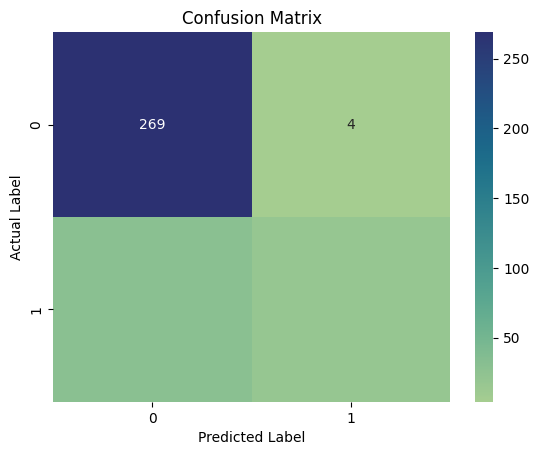

In [183]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "crest", fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [185]:
print(confusion_matrix(y_test, y_pred))

[[269   4]
 [ 29  18]]


In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.82      0.38      0.52        47

    accuracy                           0.90       320
   macro avg       0.86      0.68      0.73       320
weighted avg       0.89      0.90      0.88       320

